# Setup

In [1]:
# https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


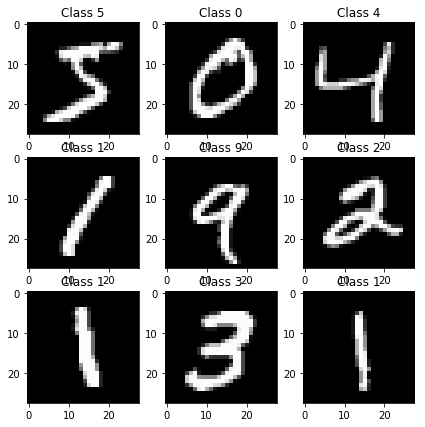

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [12]:
X_train = X_train.reshape(60000, 784)  # 784 = 28 * 28 (pixel dims), so each 2x2 img becomes a 784 len vector
X_test = X_test.reshape(10000, 784)

In [13]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [14]:
X_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [17]:
len(X_train)

60000

In [18]:
len(X_train[0])

784

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [23]:
# scale the inputs to be in the range [0-1] rather than [0-255]
# n = np.array([145, 0, 322, 120, 255])
# n / 255
# Out[13]: array([ 0.56862745,  0.        ,  1.2627451 ,  0.47058824,  1.        ])

X_train /= 255  # same as `X_train = X_train / 255`
X_test /= 255

In [4]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Make network

In [6]:
# a simple 3 layer fully connected network. 
model = Sequential()
# layer 1
model.add(Dense(512, input_shape=(784,)))  # first layer has 512 nodes; why 512?
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.

model.add(Dropout(0.2))  # Dropout helps protect the model from memorizing or "overfitting" the training data
# layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# layer 3
model.add(Dense(10))  # 3 is num of output labels
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [25]:
# categorical crossentropy, and is a loss function well-suited to comparing two probability distributions
# Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc.")
# cross-entropy is a measure of how different your predicted distribution is from the target distribution

# optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up"
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 1s - loss: 2.3030 - acc: 0.1092 - val_loss: 2.2998 - val_acc: 0.1135
Epoch 2/4
60000/60000 [==============================] - 1s - loss: 2.2967 - acc: 0.1203 - val_loss: 2.2809 - val_acc: 0.2091
Epoch 3/4
60000/60000 [==============================] - 1s - loss: 2.1570 - acc: 0.2151 - val_loss: 1.8855 - val_acc: 0.2975
Epoch 4/4
60000/60000 [==============================] - 1s - loss: 1.7300 - acc: 0.3746 - val_loss: 1.5334 - val_acc: 0.4755


# Evaluate

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)  # Scalar test loss
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.53337942314
Test accuracy: 0.4755


In [29]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9696/10000 [============================>.] - ETA: 0s

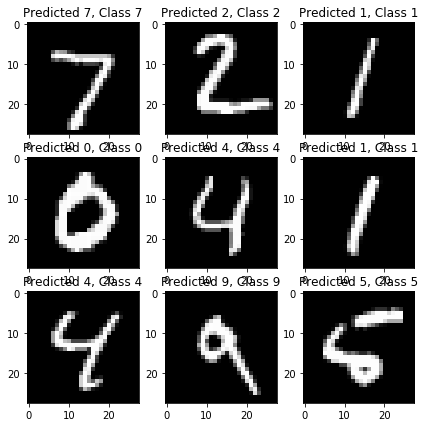

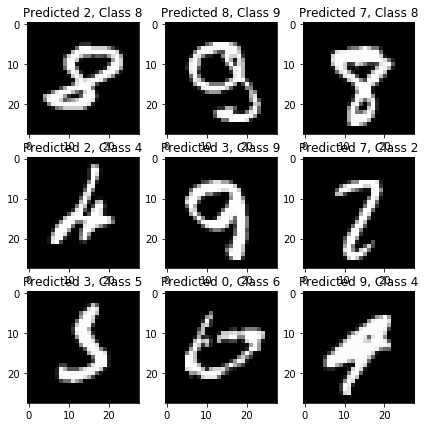

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".for mat(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))